In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def is_proper_coloring(colors, G):
    assert len(colors) == 4
    for node, other_node in G.edges:
        if colors[node] == colors[other_node]:
            return False
    return True

In [4]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 1)
available_colors = ('blue', 'red', 'green', 'yellow')

In [5]:
pos = nx.circular_layout(G)

True

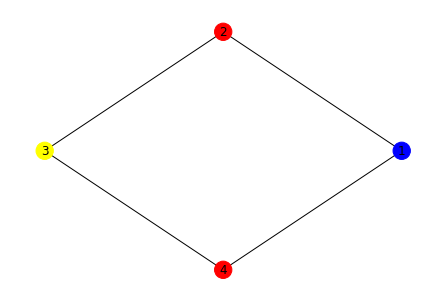

In [8]:
current_colors = {1: 'blue', 2: 'red', 3: 'yellow', 4: 'red'}
nx.draw(G, pos=pos, node_color=[current_colors[n] for n in G.nodes], with_labels=True)

is_proper_coloring(current_colors, G)

# Glauber dynamics with uniform distribution on proper colorings as the stationary distribution

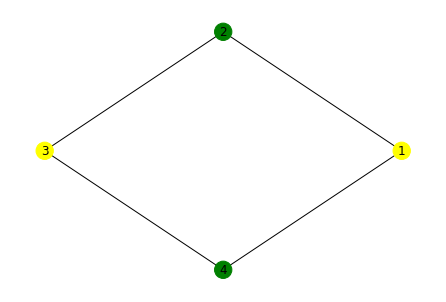

0...random node 4
allowed_colors ['blue', 'red', 'green']
random color red


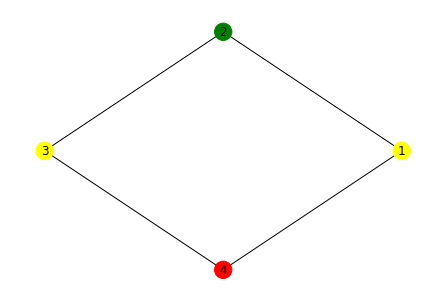

1...random node 1
allowed_colors ['blue', 'yellow']
random color yellow


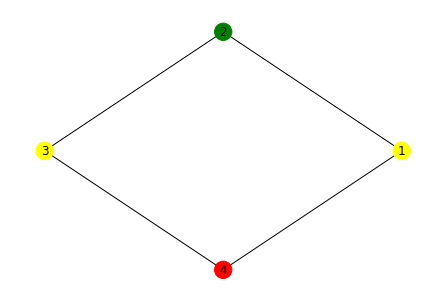

2...random node 1
allowed_colors ['blue', 'yellow']
random color blue


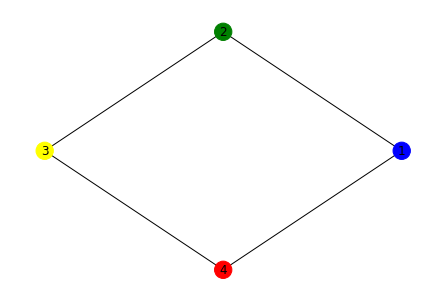

random node 3
allowed_colors ['blue', 'yellow']
random color yellow


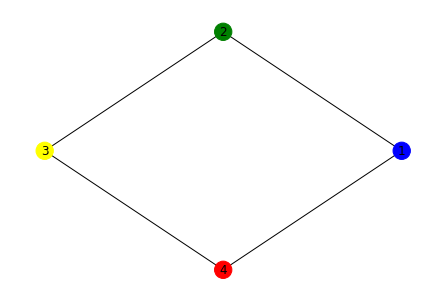

4...random node 4
allowed_colors ['red', 'green']
random color green


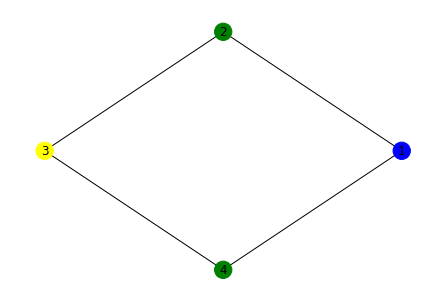

random node 2
allowed_colors ['red', 'green']
random color red


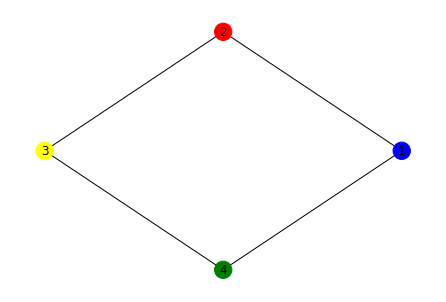

random node 2
allowed_colors ['red', 'green']
random color green


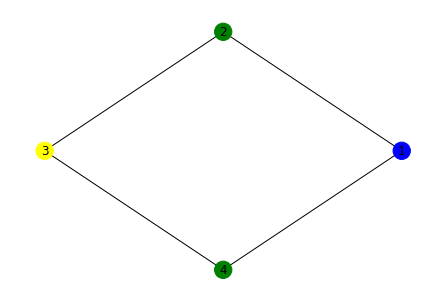

random node 1
allowed_colors ['blue', 'red', 'yellow']
random color red


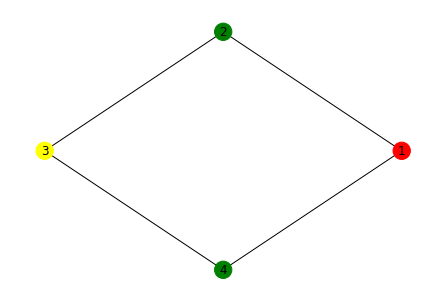

8...random node 3
allowed_colors ['blue', 'red', 'yellow']
random color red


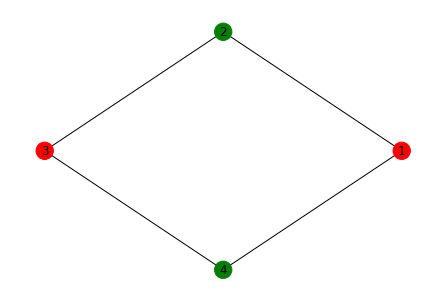

random node 4
allowed_colors ['blue', 'green', 'yellow']
random color yellow


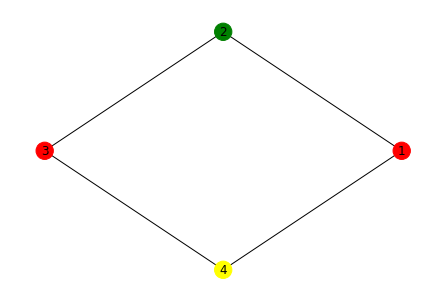

16...32...64...128...256...512...1024...2048...4096...8192...16384...

In [13]:
states_visited = []
T_steps = 30000
nx.draw(G, pos=pos, node_color=[current_colors[n] for n in G.nodes], with_labels=True)
plt.show()
for t in range(T_steps):
    if (t & (t-1) == 0): print(t, end="...")
    n_t = np.random.choice(G.nodes)
    allowed_colors = [c for c in available_colors
                        if  is_proper_coloring({**current_colors, n_t: c}, G)]
    c_t = np.random.choice(allowed_colors)
    #print("allowed for node", n_t, ":", allowed_colors)
    current_colors[n_t] = c_t
    states_visited.append(tuple(current_colors[n] for n in G.nodes))
    if t< 10:
        print('random node', n_t)
        print("allowed_colors", allowed_colors)
        print('random color', c_t)
        nx.draw(G, pos=pos, node_color=[current_colors[n] for n in G.nodes], with_labels=True)
        plt.show()

In [14]:
from collections import Counter
counts = Counter(states_visited)
counts

Counter({('yellow', 'green', 'yellow', 'red'): 343,
         ('blue', 'green', 'yellow', 'red'): 354,
         ('blue', 'green', 'yellow', 'green'): 336,
         ('blue', 'red', 'yellow', 'green'): 349,
         ('red', 'green', 'yellow', 'green'): 363,
         ('red', 'green', 'red', 'green'): 370,
         ('red', 'green', 'red', 'yellow'): 393,
         ('red', 'yellow', 'red', 'yellow'): 380,
         ('red', 'yellow', 'green', 'yellow'): 364,
         ('red', 'yellow', 'blue', 'yellow'): 354,
         ('blue', 'yellow', 'red', 'yellow'): 392,
         ('blue', 'green', 'red', 'yellow'): 356,
         ('red', 'green', 'blue', 'yellow'): 429,
         ('red', 'green', 'red', 'blue'): 365,
         ('red', 'yellow', 'red', 'blue'): 334,
         ('yellow', 'green', 'red', 'blue'): 436,
         ('red', 'blue', 'red', 'blue'): 390,
         ('green', 'blue', 'red', 'blue'): 398,
         ('green', 'blue', 'green', 'blue'): 343,
         ('green', 'blue', 'yellow', 'blue'): 332,
    

In [16]:
# proportion of time points spent at each coloring
pi_estimated = np.array(list(counts.values()))/T_steps
pi_estimated

array([0.01143333, 0.0118    , 0.0112    , 0.01163333, 0.0121    ,
       0.01233333, 0.0131    , 0.01266667, 0.01213333, 0.0118    ,
       0.01306667, 0.01186667, 0.0143    , 0.01216667, 0.01113333,
       0.01453333, 0.013     , 0.01326667, 0.01143333, 0.01106667,
       0.01203333, 0.0136    , 0.01226667, 0.01053333, 0.0119    ,
       0.01263333, 0.0124    , 0.01123333, 0.0123    , 0.01106667,
       0.01193333, 0.01233333, 0.0116    , 0.01246667, 0.01046667,
       0.01096667, 0.01373333, 0.01243333, 0.0111    , 0.01063333,
       0.00963333, 0.01123333, 0.01096667, 0.0135    , 0.0129    ,
       0.01163333, 0.0118    , 0.01193333, 0.01373333, 0.01126667,
       0.01206667, 0.01283333, 0.01163333, 0.01046667, 0.0108    ,
       0.0121    , 0.01176667, 0.01096667, 0.01236667, 0.01113333,
       0.0103    , 0.01126667, 0.01113333, 0.01183333, 0.00993333,
       0.01233333, 0.01103333, 0.01226667, 0.01396667, 0.0115    ,
       0.01186667, 0.01266667, 0.00993333, 0.01203333, 0.01246

<BarContainer object of 84 artists>

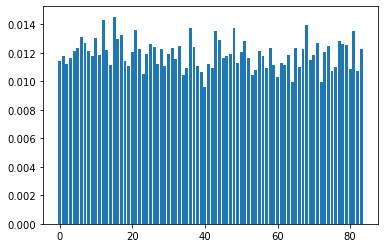

In [24]:
plt.bar([a for a in range(len(pi_estimated))], pi_estimated)

In [23]:
for coloring in [0,1,2,3,4,5]:
    print(pi_estimated[coloring]**-1)

87.46355685131195
84.74576271186442
89.28571428571429
85.95988538681948
82.64462809917356
81.08108108108108


In [22]:
np.average(pi_estimated)**-1

83.99999999999999

In [22]:
# # Compare with the exact formula:
# https://math.stackexchange.com/a/3393053/484640
r = len(available_colors)
r*(r-1)*(r**2 - 3*r + 3)

84